### Author: KR
### Date: 04/25/2025

# Topic: Predicting IMDb Movie Ratings Using Metadata

### Business Problem:

With thousands of movies released annually, understanding what makes a movie highly rated is
valuable to studios, streaming platforms, and independent filmmakers.

### Import Libraries and Load the Dataset

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv("imdb_top_1000.csv")

In [11]:
# Display the first few rows
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


### Data Preparation

In [14]:
# Remove " min" and convert Runtime to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

# Check for missing values
missing_values = df.isnull().sum()

# Display column types and missing values
print("Column Data Types:\n", df.dtypes)
print("\nMissing Values:\n", missing_values)

Column Data Types:
 Series_Title      object
Released_Year     object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score         int64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

Missing Values:
 Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [16]:
# Convert Released_Year to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

print(df['Released_Year'].dtype)

float64


### Exploratory Data Analysis (EDA)

In [19]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Summary statistics
df.describe()

Dataset Shape: (726, 14)


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,725.000000,726.000000,726.000000,726.000000,7.260000e+02,7.260000e+02
mean,1995.587586,123.508264,7.934435,77.530303,3.502067e+05,7.742839e+07
std,18.916058,25.880933,0.291060,12.135149,3.537267e+05,1.143526e+08
min,1927.000000,71.000000,7.600000,28.000000,2.519800e+04,1.001190e+05
25%,1986.000000,104.000000,7.700000,70.000000,9.051375e+04,5.909036e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.323135e+05,3.359814e+07
75%,2010.000000,136.750000,8.100000,86.000000,5.008380e+05,1.010046e+08
max,2019.000000,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


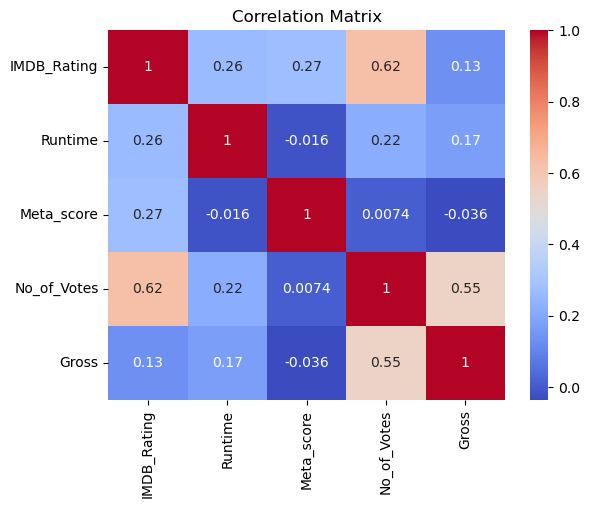

In [21]:
# Correlation matrix
corr_matrix = df[['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Highlights:

Summary Stats
- IMDB_Rating is tightly clustered (mean ≈ 7.93, std ≈ 0.29).
- No_of_Votes and Gross have a large range and high standard deviation.
- Released_Year ranges from 1927 to 2019.
- Runtime varies from 71 to 238 minutes.
   
Correlation Matrix
- No_of_Votes has the strongest correlation with IMDB_Rating (0.62).
- Runtime and Meta_score have modest positive correlation with IMDB_Rating (~0.26–0.27).
- Gross has weak correlation with IMDB_Rating (0.13).

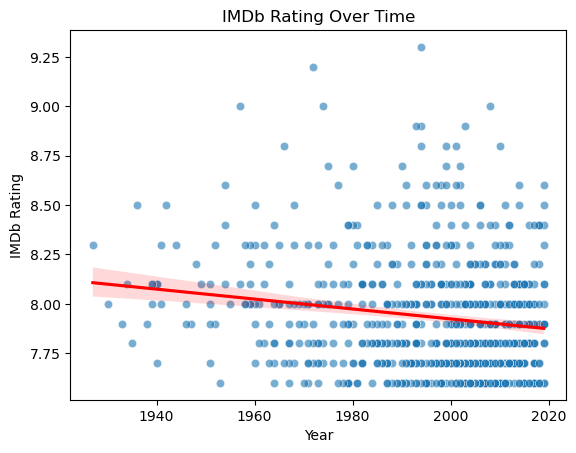

In [24]:
# Scatterplot IMDb Rating Over Time
sns.scatterplot(data=df, x='Released_Year', y='IMDB_Rating', alpha=0.6)
sns.regplot(data=df, x='Released_Year', y='IMDB_Rating', scatter=False, color='red')
plt.title("IMDb Rating Over Time")
plt.xlabel("Year")
plt.ylabel("IMDb Rating")
plt.show()

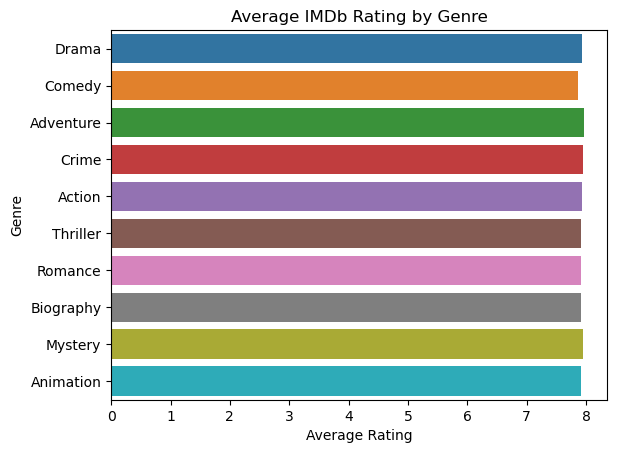

In [26]:
# Create a list of top genres
from collections import Counter

genre_list = df['Genre'].str.split(', ')
genre_counts = Counter([genre for sublist in genre_list for genre in sublist])
top_genres = [genre for genre, count in genre_counts.most_common(10)]

# One-hot encode top genres
for genre in top_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Calculate average rating by genre
genre_ratings = {genre: df[df[genre] == 1]['IMDB_Rating'].mean() for genre in top_genres}

# Barplot of Average IMDb Rating by Genre
sns.barplot(x=list(genre_ratings.values()), y=list(genre_ratings.keys()))
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

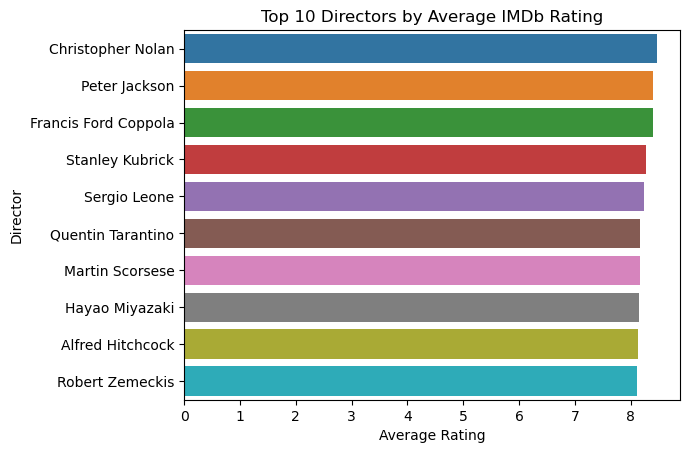

In [28]:
# Filter directors with at least 5 movies
top_directors = df['Director'].value_counts()[df['Director'].value_counts() >= 5].index
director_avg = df[df['Director'].isin(top_directors)].groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

# Barplot of Top 10 Directors by Average Rating
sns.barplot(x=director_avg.values, y=director_avg.index)
plt.title("Top 10 Directors by Average IMDb Rating")
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.show()

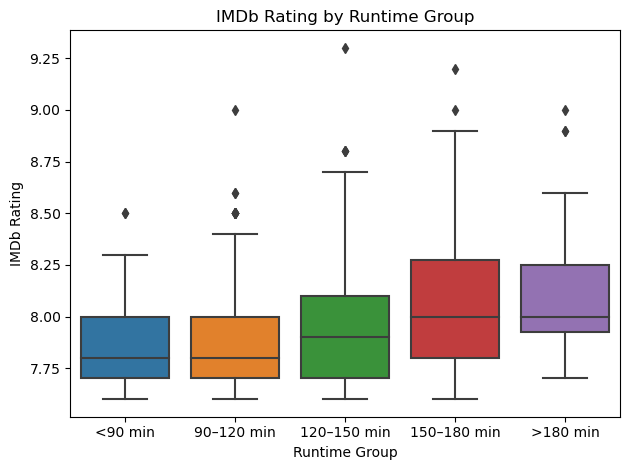

In [30]:
# Create runtime bins
df['Runtime_Group'] = pd.cut(df['Runtime'], bins=[0, 90, 120, 150, 180, 300],
                              labels=['<90 min', '90–120 min', '120–150 min', '150–180 min', '>180 min'])

# Boxplot
sns.boxplot(data=df, x='Runtime_Group', y='IMDB_Rating')
plt.title("IMDb Rating by Runtime Group")
plt.xlabel("Runtime Group")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()

Highlights:

IMDb Rating Over Time  
  
The scatterplot shows a slight downward trend in IMDb ratings over the years. While there are high-rated films across all decades, the regression line suggests that older movies tend to have slightly higher ratings on average compared to more recent releases.

This could be due to several factors:  
- Older movies in the dataset are already considered “classics” and have stood the test of time.
- Newer movies might not have accumulated as many votes or critical reassessments yet.
- IMDb users may apply stricter standards to recent releases.
   
Average IMDb Rating by Genre  
  
The bar chart shows that across the top 10 most common genres, Drama, Adventure, and Crime slightly lead in average IMDb ratings. Although the differences are subtle, these genres tend to perform better among top-rated films.

Drama in particular stands out, which aligns with its frequent appearance in critically acclaimed storytelling. On the other hand, genres like Comedy and Romance are slightly behind, possibly due to their subjective nature and variability in audience preferences.

Top 10 Directors by Average IMDb Rating  

This plot shows that Christopher Nolan, Peter Jackson, and Francis Ford Coppola top the list of directors with the highest average IMDb ratings (among those with at least five films). Their consistent presence in the top-rated films highlights their strong audience and critical appeal.  

The chart also features legendary names like Stanley Kubrick, Martin Scorsese, and Alfred Hitchcock, showing that both modern and classic directors hold lasting influence in film excellence.  

IMDb Rating by Runtime Group  

The boxplot shows that movies with longer runtimes—especially those between 150–180 minutes—tend to have slightly higher IMDb ratings on average. Shorter films (under 90 minutes) appear to receive the lowest ratings on average, though the difference is modest.  

This suggests that longer movies may offer more depth or complexity, which resonates better with IMDb audiences. However, the overlap across all groups shows that runtime alone isn’t a strong predictor of a film’s success—it’s one of many factors.

### Modeling: Linear Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features
numeric_features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
genre_features = [col for col in df.columns if col in ['Drama', 'Action', 'Crime', 'Comedy', 'Adventure', 
                                                       'Thriller', 'Romance', 'Biography', 'Mystery', 'Animation']]

# Define X and y
X = df[numeric_features + genre_features]
y = df['IMDB_Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [38]:
# R-squared score
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Show results
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.616
RMSE: 0.198


Linear Regression Model – Evaluation  
  
R² = 0.616  
- This means that about 62% of the variance in IMDb ratings can be explained by the features I used (runtime, metascore, number of votes, gross earnings, and genres).
- For real-world movie data, an R² over 0.6 is good, especially since movie ratings are subjective and influenced by many factors that I don't have in the dataset.

RMSE = 0.198  
- This means that, on average, the model’s prediction is about 0.2 points off from the actual IMDb rating.
- Since IMDb ratings are usually between 7.5 and 9.0 in this dataset, this is a very acceptable margin of error.